In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.measure import regionprops
from mylib import *
from copy import deepcopy
#%matplotlib notebook

In [41]:
fatia = np.load("secao_do_plug.npy")
show_npy(fatia)

shape=(925, 920), type=uint16
min= 0, max=10184


In [42]:
def normalise_image(img):
    max_val = np.max(img)
    img = img/max_val
    return img

In [43]:
fatia = normalise_image(fatia)

<IPython.core.display.Javascript object>


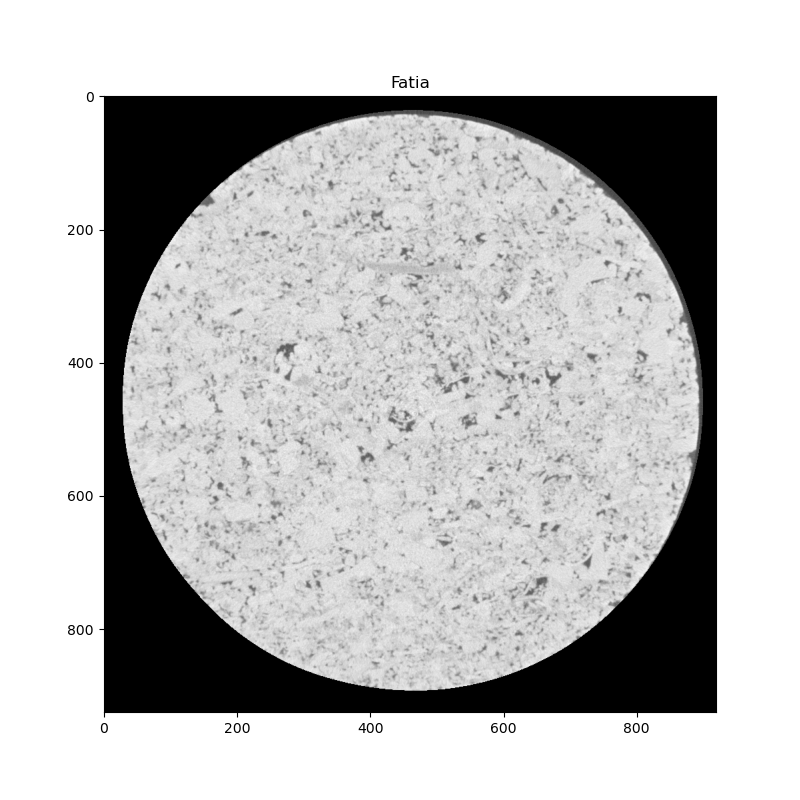

In [44]:
show_gray(fatia, "Fatia")

<IPython.core.display.Javascript object>


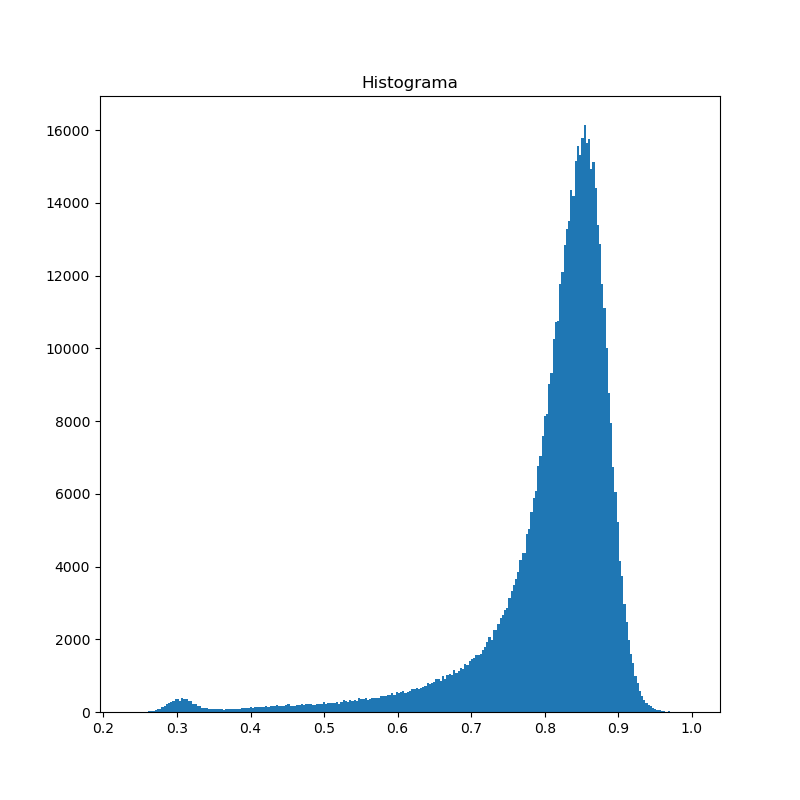

In [45]:
mask = fatia > 0
data = fatia[fatia>0]
show_hist(data.ravel(), "Histograma")

In [46]:
numSegments = 5000

<IPython.core.display.Javascript object>


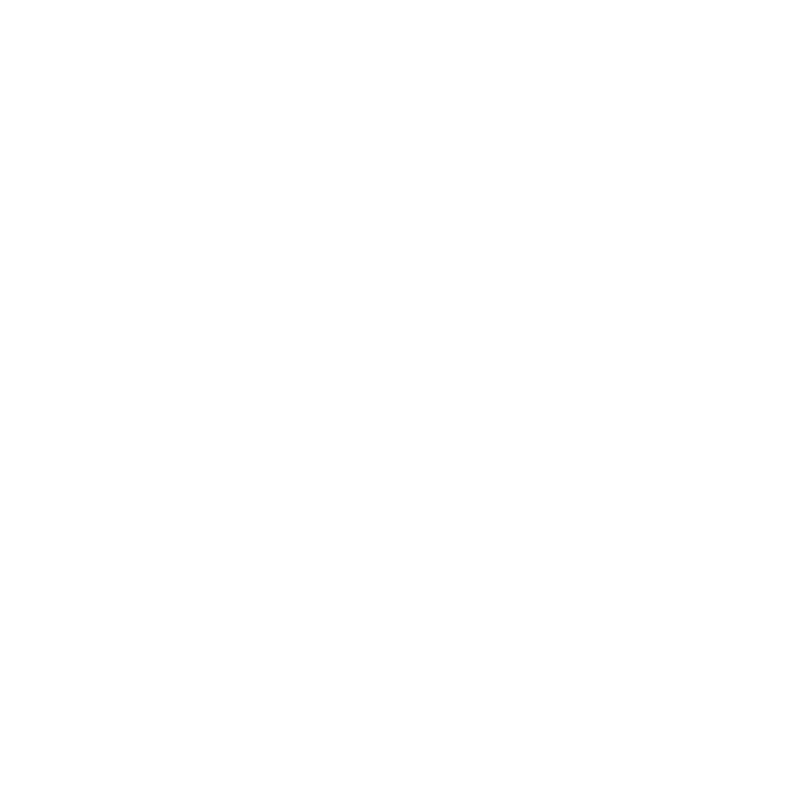

In [47]:
segments = slic(fatia, n_segments=numSegments, compactness=0.06, start_label=1, slic_zero=False, mask=mask)
fatia_bound = mark_boundaries(fatia, segments, (1, 0, 0))
show_gray(fatia_bound, "Fatia")

In [48]:
def fill_region(img, region, value):
    for i in range(region.shape[0]):
        img[region[i][0]][region[i][1]] = value
    return img

In [49]:
def mse(matrix, value):
    return (np.square(matrix - value)).mean(axis=None)

In [50]:
regions = regionprops(segments, intensity_image=fatia)

cx = []
cy = []
means_image = deepcopy(fatia)
mse_image = deepcopy(fatia)

for props in regions:
    y, x = props.centroid
    values = props.intensity_image
    cx.append(x)
    cy.append(y)
    mean = props.mean_intensity
    means_image = fill_region(means_image, props.coords, mean)
    mse_image = fill_region(mse_image, props.coords, mse(values, mean))

In [51]:
def show_centroids(img, cx, cy, title):
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.imshow(img, cmap="gray")
    plt.scatter(x=cx, y=cy, c='b', s=5)
    plt.show()

<IPython.core.display.Javascript object>


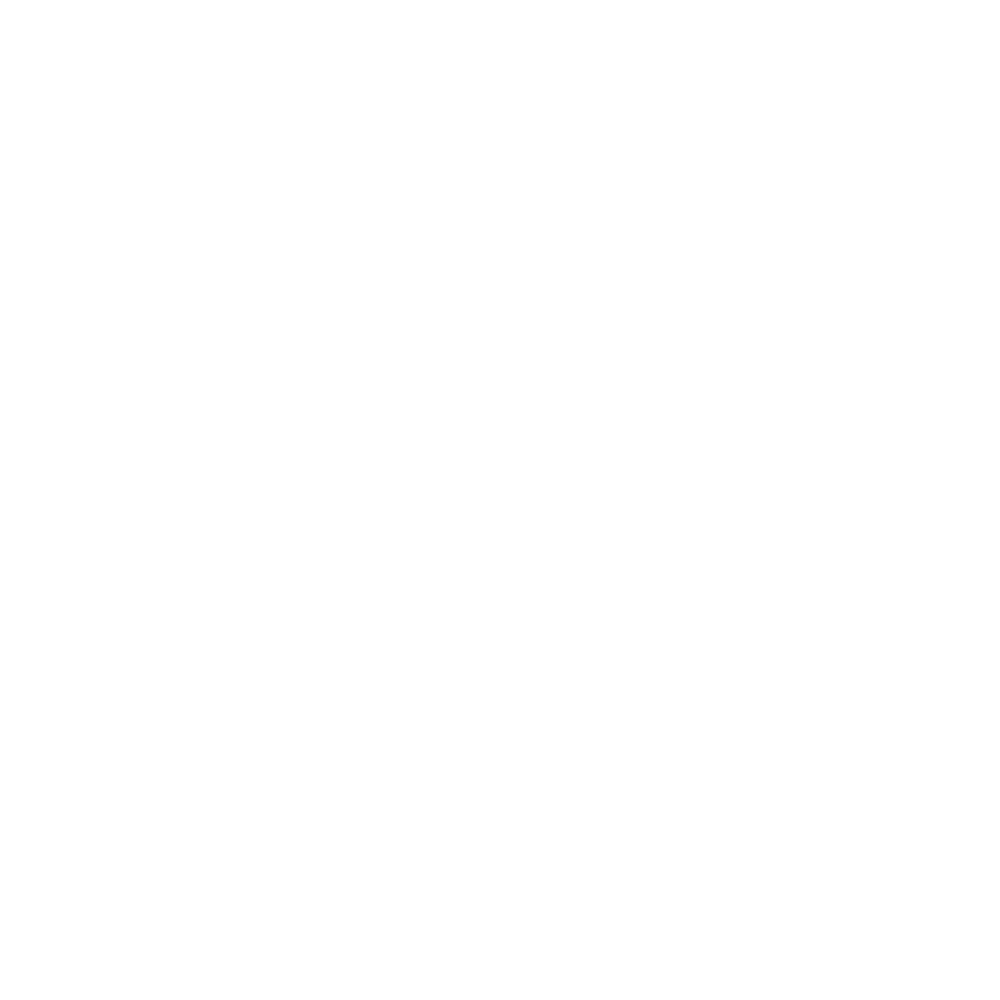

In [52]:
show_centroids(fatia_bound, cx, cy, "Centroides")

In [53]:
len(cx)

4458